In [1]:
### Week 4-2: Tree-based Models : Coding example

## 0. Loading the dataset
import pandas as pd
import numpy as np

# Load the dataset 
# Will predict a person's income based on other information
adult_df = pd.read_csv("Adult.csv")
adult_df = pd.get_dummies(adult_df, columns = ['race','sex','workclass','marital-status'])

# Construct variables
X = adult_df.iloc[:,1:]
y = adult_df.iloc[:,0]

# Split the data into training and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=5)

/Users/chpyo/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
## 1. Classification tree
# Build a tree model with 3 layers
from sklearn.tree import DecisionTreeClassifier
decisiontree = DecisionTreeClassifier(max_depth=3)  
model = decisiontree.fit(X_train, y_train)

# Make prediction and evaluate accuracy
y_test_pred = model.predict(X_test)      

from sklearn.metrics import accuracy_score
accuracy_cart = accuracy_score(y_test, y_test_pred)

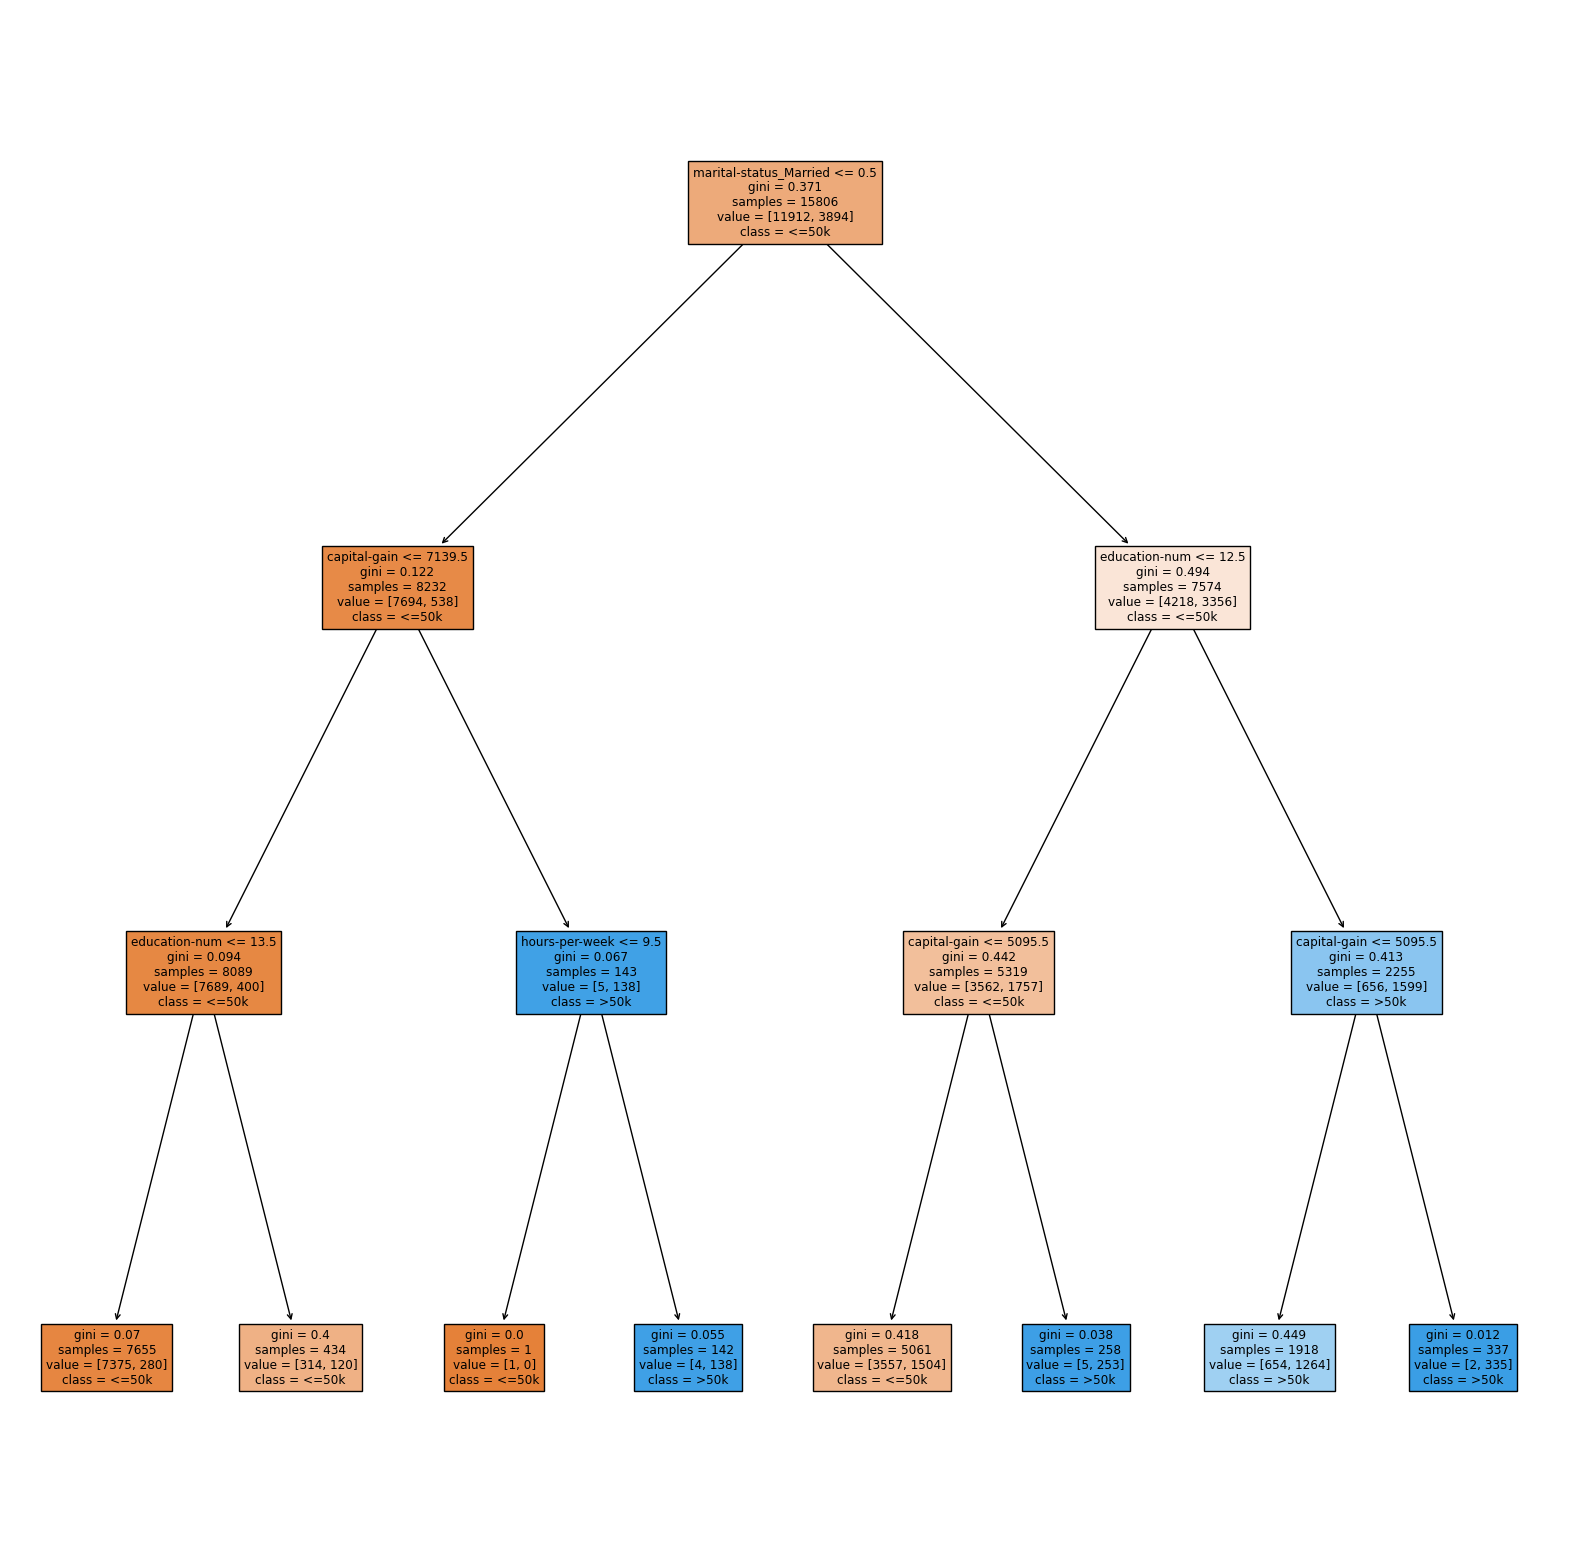

In [3]:
# Print the tree
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
features = X.columns
classes = ['<=50k','>50k']
tree.plot_tree(model,feature_names=features,class_names=classes,filled=True)
plt.show()

In [4]:
# K-fold cross validation for trees with different depths
from sklearn.model_selection import cross_val_score
for i in range (2,21):                                                 
    model2 = DecisionTreeClassifier(max_depth=i)
    scores = cross_val_score(estimator=model2, X=X, y=y, cv=5)
    print(i,':',np.average(scores))

2 : 0.823202802053625
3 : 0.8387590828378528
4 : 0.8424468167386971
5 : 0.8432096902288432
6 : 0.8468126963406165
7 : 0.8473637862901418
8 : 0.8489745574989709
9 : 0.845329106645535
10 : 0.8447357516146294
11 : 0.8424891806332324
12 : 0.8385473801443588
13 : 0.8369788919829384
14 : 0.8358346176797754
15 : 0.8320198998914942
16 : 0.8328675281197537
17 : 0.8257464323285741
18 : 0.8254918267596982
19 : 0.8232876915369497
20 : 0.8204055543413513


2 : 0.8343503452756217
3 : 0.8352404811266425
4 : 0.8353252897628403
5 : 0.8349862528443591
6 : 0.8346048699973707


0.832909460834181

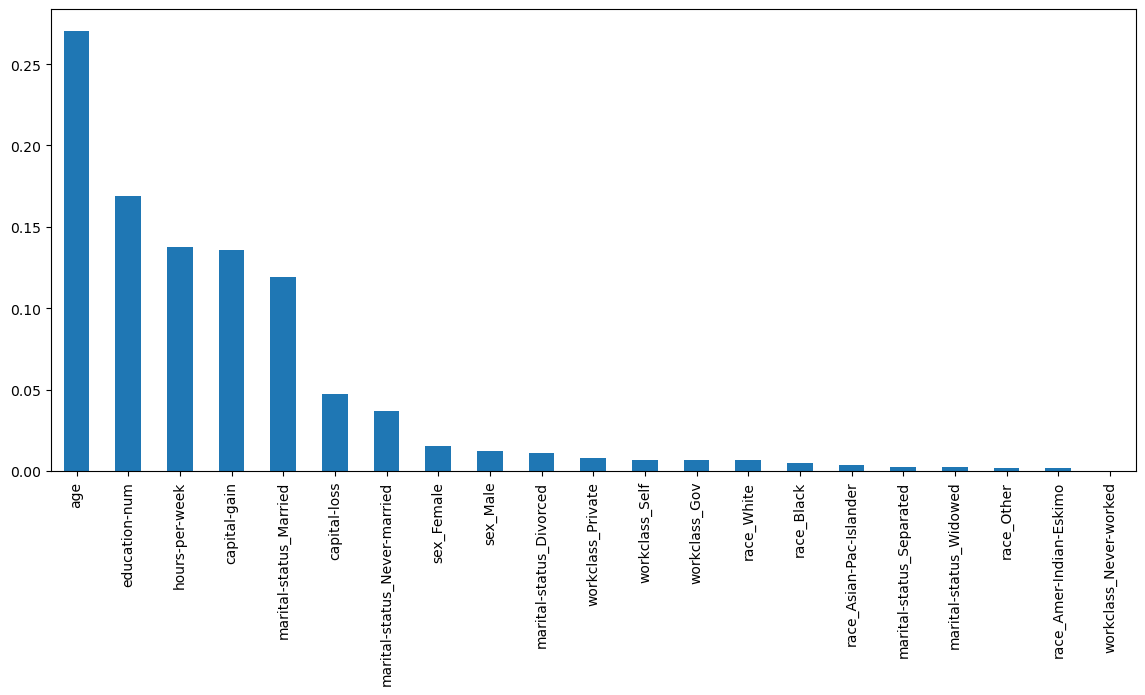

In [5]:
## 2. Random Forest
# Build the model
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier(random_state=0)
model_rf = randomforest.fit(X_train, y_train)

# Print feature importance
pd.Series(model_rf.feature_importances_,index = X.columns).sort_values(ascending = False).plot(kind = 'bar', figsize = (14,6))

# Make prediction and evaluate accuracy
y_test_pred = model_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_test_pred)

# K-fold cross validation for different numbers of features to consider at each split
for i in range (2,7):                                                                   
    model2 = RandomForestClassifier(random_state=0,max_features=i,n_estimators=100)
    scores = cross_val_score(estimator=model2, X=X, y=y, cv=5)
    print(i,':',np.average(scores))
    
# Cross-validate internally using OOB observations
randomforest2 = RandomForestClassifier(random_state=0,oob_score=True)   
model3 = randomforest2.fit(X, y)
model3.oob_score_
# OOB scores only provide accuracy score
# If you want to look at other performance measures, you need to split the data into training and test sets instead of using OOB

In [6]:
## 3. Gradient Boosting Algorithm
# Build the model
from sklearn.ensemble import GradientBoostingClassifier
gbt = GradientBoostingClassifier()                           
model_gbt = gbt.fit(X_train, y_train)

# Make prediction and evaluate accuracy
y_test_pred = model_gbt.predict(X_test)
accuracy_gbt = accuracy_score(y_test, y_test_pred)

# K-fold cross-validation with different number of samples required to split
for i in range (2,10):                                                                        
    model2 = GradientBoostingClassifier(random_state=0,min_samples_split=i,n_estimators=100)
    scores = cross_val_score(estimator=model2, X=X, y=y, cv=5)
    print(i,':',np.average(scores))

2 : 0.8537217750328082
3 : 0.8538065567199637
4 : 0.8532978665970303
5 : 0.8532978665970303
6 : 0.8531283032227192
7 : 0.8530859123791414
8 : 0.8532130669438465
9 : 0.8531283211887473
